In [2]:
import numpy as np
from PIL import Image
import cv2

In [52]:
image = np.array(Image.open("../resources/dog.jpeg").convert('L'))


In [53]:
dft = np.fft.fft2(image)
dft 

array([[19770384.              +0.j        ,
          788374.43465155-1184768.21422914j,
         -247797.26828835 +700144.43737151j, ...,
         -341156.79129608 +833917.75854973j,
         -247797.26828835 -700144.43737151j,
          788374.43465155+1184768.21422914j],
       [ 1021914.81553875 -535678.81516572j,
         -106013.48291918+1291984.43331787j,
          312357.18971136 -357967.95331175j, ...,
           94875.52718759 -691581.59465561j,
          231193.6689445  +556057.84867697j,
        -1054640.05758519 +569737.23711162j],
       [ -746130.83297157 -266878.13827965j,
         -196412.41213424 +534397.95836987j,
           87515.44773742 -346901.9140205j , ...,
           71700.69789589  +80922.05025297j,
          -33924.01450934 -929607.20436937j,
           31559.81479789 +423509.04880684j],
       ...,
       [ -186573.474518   +418734.64761095j,
          120496.73123925 +610930.32937845j,
          264097.54402355 -549045.10505395j, ...,
         -238859.235

In [54]:
dft_shifted = np.fft.fftshift(dft)  # Shift zero frequency to center
dft_shifted

array([[   5.01466856+405.04647383j, -110.13795711-211.73443982j,
        -117.47610428-152.29906894j, ..., -226.2578763 +102.68229933j,
        -278.27478398-223.65054316j,  458.71028428-181.28776069j],
       [  50.75231262-243.10538379j, -289.77078909 +89.31855703j,
         191.72226313-424.68438958j, ...,  -89.29099051+431.01807999j,
         -36.68020376 -86.22146172j,  118.3519698  -98.64615146j],
       [  94.55687109+199.12249152j,  246.19854402-249.6011261j ,
         130.60578091+341.56395339j, ...,  -36.49230304-217.04019669j,
          64.98115685+152.5529037j ,   95.20409218-143.21785803j],
       ...,
       [  94.55687109-199.12249152j,   95.20409218+143.21785803j,
          64.98115685-152.5529037j , ...,  136.51932035+124.94986145j,
         130.60578091-341.56395339j,  246.19854402+249.6011261j ],
       [  50.75231262+243.10538379j,  118.3519698  +98.64615146j,
         -36.68020376 +86.22146172j, ...,  -40.52676182-658.81086512j,
         191.72226313+424.68438958j

In [68]:
rows, cols = dft_shifted.shape
center = (rows // 2, cols // 2)
mask = np.zeros((rows, cols), dtype=np.uint8)

In [69]:
print((mask*dft_shifted).shape)


(343, 474)


In [73]:
D0 = 100
for u in range(rows):
        for v in range(cols):
            D = np.sqrt((u - center[0]) ** 2 + (v - center[1]) ** 2)
            if D <= D0:
                mask[u, v] = 1  # Retain low frequencies
    
filtered_dft = dft_shifted*mask

print(dft)

[[19770384.              +0.j           788374.43465155-1184768.21422914j
   -247797.26828835 +700144.43737151j ...
   -341156.79129608 +833917.75854973j  -247797.26828835 -700144.43737151j
    788374.43465155+1184768.21422914j]
 [ 1021914.81553875 -535678.81516572j  -106013.48291918+1291984.43331787j
    312357.18971136 -357967.95331175j ...
     94875.52718759 -691581.59465561j   231193.6689445  +556057.84867697j
  -1054640.05758519 +569737.23711162j]
 [ -746130.83297157 -266878.13827965j  -196412.41213424 +534397.95836987j
     87515.44773742 -346901.9140205j  ...
     71700.69789589  +80922.05025297j   -33924.01450934 -929607.20436937j
     31559.81479789 +423509.04880684j]
 ...
 [ -186573.474518   +418734.64761095j   120496.73123925 +610930.32937845j
    264097.54402355 -549045.10505395j ...
   -238859.2354294  +147466.42322418j  -466485.87127828 -199059.03770011j
    363901.17548277 +139622.57484622j]
 [ -746130.83297157 +266878.13827965j    31559.81479789 -423509.04880684j
    -

In [74]:
 # Step 4: Convert Back to Spatial Domain
inverse_dft = np.fft.ifftshift(filtered_dft)
image_filtered = np.fft.ifft2(inverse_dft)
image_filtered = np.abs(image_filtered)
image_filtered = np.clip(image_filtered, 0, 255).astype(np.uint8)



In [75]:
cv2.imshow("Low-Pass Filtered Image", image_filtered)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [ ]:
import numpy as np

def ideal_filter(dft_shifted, cutoff=10, type="low_pass"):
    rows, cols = dft_shifted.shape
    center = (rows // 2, cols // 2)
    
    # Create a grid of distances from the center
    x = np.arange(cols) - center[1]
    y = np.arange(rows) - center[0]
    xx, yy = np.meshgrid(x, y)
    distance = np.sqrt(xx**2 + yy**2)
    
    # Create the mask based on the filter type
    if type == "low_pass" or "lp":  # Low-pass filter
        mask = (distance <= cutoff).astype(np.uint8)
    elif type == "high_pass" or "hp":  # High-pass filter
        mask = (distance > cutoff).astype(np.uint8)
    else:
        raise ValueError("Invalid filter type. Use 'lp' or 'hp'.")
    
    return mask

def calculate_dft(img):
    dft = np.fft.fft2(img)
    dft_shifted = np.fft.fftshift(dft)
    return dft_shifted, np.abs(dft_shifted)

def filter_image(dft_shifted, mask):
    filtered_dft = dft_shifted * mask
    inverse_dft = np.fft.ifftshift(filtered_dft)
    image_filtered = np.fft.ifft2(inverse_dft)
    image_filtered = np.abs(image_filtered)
    image_filtered = np.clip(image_filtered, 0, 255).astype(np.uint8)
    return image_filtered


    

In [ ]:
def hybrid_filter(img1, img2, cutoff1 = 10, cutoff2 = 10, type1 = "lp", type2 = "lp"):
    
    image1 = ideal_filter(img1, cutoff1, type1)
    image2 = ideal_filter(img2, cutoff2, type2)
    
    if image1.shape != image2.shape:
        # Assuming image1 is (320, 320) and image2 is (600, 600)
        image1 = cv2.resize(image1, (image2.shape[1], image2.shape[0]))
        print(f"image 1 shape {image1.shape}")
        print(f"image 2 shape {image2.shape}")
        
    hybird_image = image1 + image2
    
    return np.clip(hybird_image, 0, 255).astype(np.uint8)

<>:61: SyntaxWarning: invalid escape sequence '\d'
<>:62: SyntaxWarning: invalid escape sequence '\d'
<>:61: SyntaxWarning: invalid escape sequence '\d'
<>:62: SyntaxWarning: invalid escape sequence '\d'
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_1452\1294539110.py:61: SyntaxWarning: invalid escape sequence '\d'
  img1 = cv2.imread('..\data\lena.png', cv2.IMREAD_GRAYSCALE)
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_1452\1294539110.py:62: SyntaxWarning: invalid escape sequence '\d'
  img2 = cv2.imread('..\data\cameraman.png', cv2.IMREAD_GRAYSCALE)


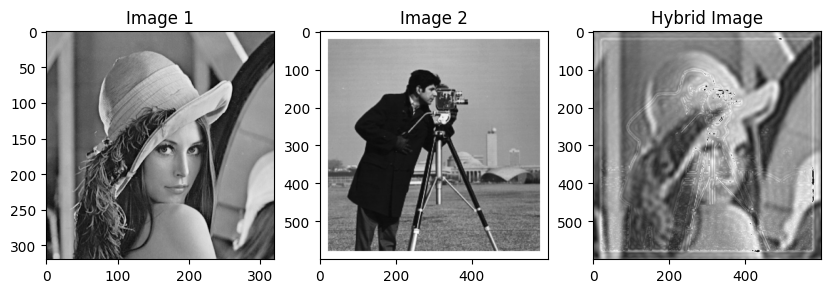

In [2]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

def ideal_filter(dft_shifted, cutoff=10, type="low_pass"):
    rows, cols = dft_shifted.shape
    center = (rows // 2, cols // 2)
    
    # Create a grid of distances from the center
    x = np.arange(cols) - center[1]
    y = np.arange(rows) - center[0]
    xx, yy = np.meshgrid(x, y)
    distance = np.sqrt(xx**2 + yy**2)
    
    # Create the mask based on the filter type
    if type == "low_pass" or type == "lp":  # Low-pass filter
        mask = (distance <= cutoff).astype(np.uint8)
    elif type == "high_pass" or type == "hp":  # High-pass filter
        mask = (distance > cutoff).astype(np.uint8)
    else:
        raise ValueError("Invalid filter type. Use 'lp' or 'hp'.")
    
    return mask

def calculate_dft(img):
    dft = np.fft.fft2(img)
    dft_shifted = np.fft.fftshift(dft)
    return dft_shifted, np.abs(dft_shifted)

def filter_image(dft_shifted, mask):
    filtered_dft = dft_shifted * mask
    inverse_dft = np.fft.ifftshift(filtered_dft)
    image_filtered = np.fft.ifft2(inverse_dft)
    image_filtered = np.abs(image_filtered)
    image_filtered = np.clip(image_filtered, 0, 255).astype(np.uint8)
    return image_filtered

def hybrid_filter(img1, img2, cutoff1=10, cutoff2=10, type1="lp", type2="hp"):
    # Calculate DFT for both images
    dft_shifted1, _ = calculate_dft(img1)
    dft_shifted2, _ = calculate_dft(img2)
    
    # Create masks
    mask1 = ideal_filter(dft_shifted1, cutoff1, type1)
    mask2 = ideal_filter(dft_shifted2, cutoff2, type2)
    
    # Filter images
    filtered_img1 = filter_image(dft_shifted1, mask1)
    filtered_img2 = filter_image(dft_shifted2, mask2)
    
    # Resize images if necessary
    if filtered_img1.shape != filtered_img2.shape:
        filtered_img1 = cv2.resize(filtered_img1, (filtered_img2.shape[1], filtered_img2.shape[0]))
    
    # Combine images
    hybrid_image = filtered_img1 + filtered_img2
    
    return np.clip(hybrid_image, 0, 255).astype(np.uint8)

# Load images
img1 = cv2.imread('..\data\lena.png', cv2.IMREAD_GRAYSCALE)
img2 = cv2.imread('..\data\cameraman.png', cv2.IMREAD_GRAYSCALE)

# Ensure images are loaded
if img1 is None or img2 is None:
    raise ValueError("One or both images could not be loaded. Please check the file paths.")

# Apply hybrid filter
hybrid_image = hybrid_filter(img1, img2, cutoff1=30, cutoff2=30, type1="lp", type2="hp")

# Display results
plt.figure(figsize=(10, 5))

plt.subplot(1, 3, 1)
plt.title('Image 1')
plt.imshow(img1, cmap='gray')

plt.subplot(1, 3, 2)
plt.title('Image 2')
plt.imshow(img2, cmap='gray')

plt.subplot(1, 3, 3)
plt.title('Hybrid Image')
plt.imshow(hybrid_image, cmap='gray')

plt.show()